In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=[]

env: CUDA_VISIBLE_DEVICES=[]


### Zebra Finch vocalizations
Source:
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181992
- https://osf.io/bx76r/
- http://localhost:8186/notebooks/tsainbur/Projects/github_repos/animalvocalizationgenerativenet/notebooks/birdsong/zebra_finch/1.0-segment-song-from-wavs.ipynb

This dataset is larger than the other, but only contains songs, and from fewer individuals

In [2]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import IPython
import seaborn as sns

In [ ]:
import pdb
from joblib import Parallel, delayed
n_jobs = 10
verbosity = 5

In [10]:
from tqdm.autonotebook import tqdm

### data locations

In [5]:
DSLOC = Path('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/')

In [6]:
MATFILES = list(DSLOC.expanduser().glob('*/*.mat'))
MATFILES = [i for i in MATFILES if i.stem[0]!='.']
len(MATFILES)

8

In [7]:
MATFILES

[PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lr13/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lr77/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lr28/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lny46/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lny4rb/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lr12/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lny64/song.mat'),
 PosixPath('/mnt/cube/Datasets/ZebraFinch/OSF-BX76R/lny42/song.mat')]

In [8]:
import h5py as h5

In [11]:
for mat_file in tqdm(MATFILES):
    indv = mat_file.parent.stem
    # try loading the MAT file
    try:
        with h5.File(mat_file) as f: 
            song = f['song'].value
            rate = f['fs'].value[0]
    except: 
        print(indv +' failed')
        continue
    break

In [12]:
np.shape(song)

(3000, 22923)

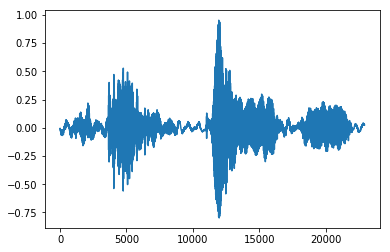

In [14]:
plt.plot(song[0,:])

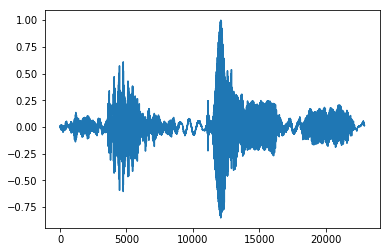

In [15]:
plt.plot(song[1,:])